### Read csv, use NLTK

In [4]:
# dependencies
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
# Read data into dataframe
file = os.path.join('..', 'Raw Data', 'train.csv' )
tweet_df = pd.read_csv(file, encoding='latin-1')
tweet_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:
# Check tweet length
tweet_df['pre_clean_len'] = [len(t) for t in tweet_df.SentimentText]
tweet_df.head()

,ItemID,Sentiment,SentimentText,pre_clean_len
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53


In [7]:
# Preprocessing
#import string 
import input_reader as inread

tweet_df['Tokenized'] = [inread.get_tokens(t) for t in tweet_df.SentimentText]
tweet_df.head()

,ItemID,Sentiment,SentimentText,pre_clean_len,Tokenized
0,1,0,is so sad for my APL frie...,61,"[sad, friend]"
1,2,0,I missed the New Moon trail...,51,"[miss, new, moon, trailer]"
2,3,1,omg its already 7:30 :O,37,[already]
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132,"[cry, dentist, since, get, crown, put]"
4,5,0,i think mi bf is cheating on me!!! ...,53,"[think, mi, cheating]"


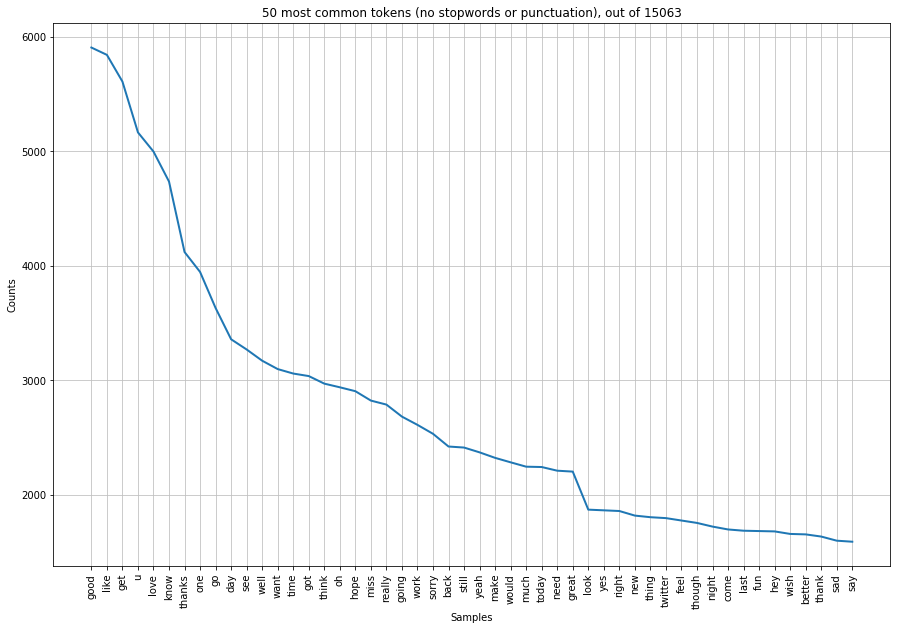

In [5]:
# https://vprusso.github.io/blog/2018/natural-language-processing-python-1/
# https://wordnet.princeton.edu/
# Words stat
import nltk

from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))

from nltk.probability import FreqDist

tokens_list =  [w for sublist in tweet_df.Tokenized for w in sublist]
tokens_list

# See https://en.wikipedia.org/wiki/Zipf%27s_law
fdist = nltk.FreqDist(tokens_list)
fdist.plot(50, cumulative=False, title=f"50 most common tokens (no stopwords or punctuation), out of {len(fdist.keys())}")


In [8]:
# Tweets to file
file = os.path.join('..', 'Output', 'tweets1.csv' )
out_df = tweet_df.loc[:, ['ItemID', 'Sentiment', 'Tokenized']]
out_df['Tokenized'] = out_df.Tokenized.apply(' '.join)
out_df.to_csv(file, index=False)

# Words to file
words_df = pd.DataFrame.from_dict(fdist.items())
words_df.columns = ['word','count']
words_df.sort_values(by=['word'], inplace=True)
words_df = words_df.reset_index(drop=True)
file = os.path.join('..', 'Output', 'words1.csv' )
words_df.to_csv(file)
words_df.head()

PermissionError: [Errno 13] Permission denied: '..\\Output\\tweets1.csv'

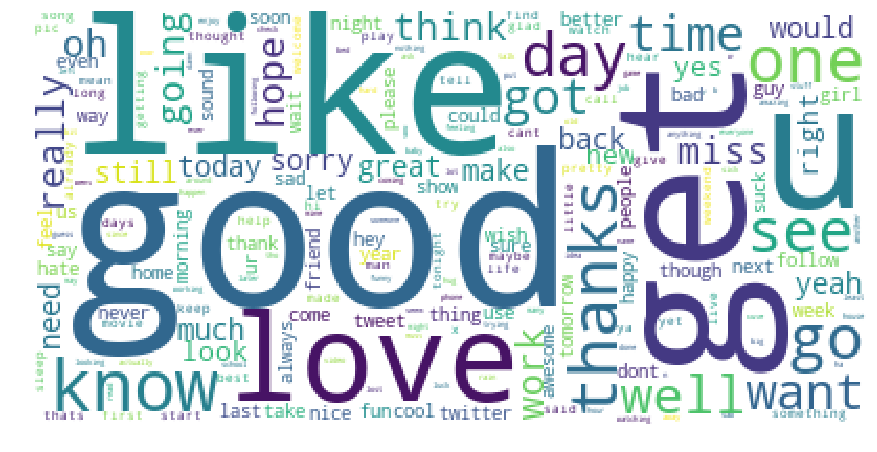

In [7]:
# A bit of fun with visualization
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict([t for t in fdist.items()]))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [9]:
# test tokenizers
#test_txt = '@AnnOhio Hi Ann!!!!  *HUGE HUGS from FL*'
test_txt1 = ".. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)..."
#test_txt = "uploading pictures on friendster" 
print(inread.get_tokens(test_txt1))


['cry', 'dentist', 'since', 'get', 'crown', 'put']
